# 사전학습(Pre-Trained) 모델 사용하기
## 모델 약간 수정해서 사용하기(=Transfer Learning)
## ImageNet을 학습한 모델
## VGG16, VGG19, InceptionV3, Xception, ResNet50
## 출처 : https://wikibook.co.kr/practical-deep-learning/

In [1]:
%matplotlib inline
from tensorflow.python.keras.applications.vgg16 import VGG16

# 1000클래스를 분류하지 않기 때문에 include_top = False로 모델 불러옴
# 즉, FC layer 부분을 불러오지 않음
vgg16 = VGG16(include_top = False, input_shape=(224,224,3))

C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorflow\python\framework

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensor

In [2]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
# 생성기(Generator) 생성
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.applications.vgg16 import preprocess_input

# train용 generator
idg_train = ImageDataGenerator(
            rescale=1/255,
            shear_range=0.1,
            zoom_range = 0.1,
            horizontal_flip=True,
            preprocessing_function=preprocess_input)

In [4]:
# 이미지를 읽어 들이기 위한 iterator 생성

# 훈련용 데이터(학습할 때 이용) - train 폴더에 있는 모든 이미지 읽어옴
img_itr_train = idg_train.flow_from_directory(
    'D:/practical-deep-learning-example/chap6/img/shrine_temple/train', 
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
)

# 검증용 데이터(학습할 때 이용) - validation 폴더에 있는 모든 이미지 읽어옴
img_itr_validation = idg_train.flow_from_directory(
    'D:/practical-deep-learning-example/chap6/img/shrine_temple/validation', 
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
)

Found 600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [5]:
# 모델 일부 변경
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten

def build_transfer_model(vgg16) :
    
    # 기존 vgg16 모델을 새로운 vgg16 모델로 생성
    model = Sequential(vgg16.layers)
    
    # 추가한 층과 출력층에 가까운 층의 가중치만 재학습
    for layer in model.layers[:15] :
        layer.trainable = False
        
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    # 1개의 클래스로만 분류
    model.add(Dense(1, activation='sigmoid'))
    
    return model

# 정의한 함수를 호출하여 네트워크 생성
model = build_transfer_model(vgg16)

In [6]:
# 모델 컴파일
from tensorflow.python.keras.optimizers import SGD

model.compile(loss='binary_crossentropy',
             optimizer=SGD(lr=1e-4, momentum=0.9),
             metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
# 수정된 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [9]:
# 모델 학습 저장용 폴더 준비
import os
from datetime import datetime

model_dir = os.path.join('models', datetime.now().strftime('%y%m%d_%H%M'))
os.makedirs(model_dir, exist_ok=True)
print('model_dir: ',model_dir)

dir_weights = os.path.join(model_dir,'weights')
os.makedirs(dir_weights, exist_ok=True)

model_dir:  models\201109_1356


In [10]:
# 네트워크 구조와 클래스 레이블 저장
import json
import pickle

# 네트워크 저장
model_json = os.path.join(model_dir, 'model.json')
with open(model_json, 'w') as f:
    json.dump(model.to_json(), f)

# 학습 시 정답 레이블 저장
model_classes = os.path.join(model_dir, 'classes.pkl')
with open(model_classes, 'wb') as f:
    pickle.dump(img_itr_train.class_indices, f)

In [11]:
# 미니 배치를 몇 개 학습하면 1 에폭이 되는지 계산
import math

batch_size = 16
steps_per_epoch = math.ceil(
    img_itr_train.samples / batch_size)

validation_steps = math.ceil(
    img_itr_validation.samples / batch_size)

In [12]:
from tensorflow.python.keras.callbacks import ModelCheckpoint, CSVLogger


# 콜백의 설정
cp_filepath =  os.path.join(dir_weights, 'ep_{epoch:02d}_ls_{loss:.1f}.h5')
cp = ModelCheckpoint(
                     cp_filepath, 
                     monitor='loss', 
                     verbose=0,
                     save_best_only=False, 
                     save_weights_only=True, 
                     mode='auto', 
                     period=5
                     )

csv_filepath =  os.path.join(model_dir, 'loss.csv')
csv = CSVLogger(csv_filepath, append=True)

In [13]:
n_epoch = 30

# 모델 학습
history = model.fit_generator(
    img_itr_train, 
    steps_per_epoch=steps_per_epoch, 
    epochs=n_epoch,  # 학습할 에폭수
    validation_data=img_itr_validation, 
    validation_steps=validation_steps,
    callbacks = [cp, csv]
)

Epoch 1/30
38/38 [==============================] - 85s 2s/step - loss: 0.6553 - acc: 0.6250 - val_loss: 0.4868 - val_acc: 0.7550
Epoch 2/30
38/38 [==============================] - 83s 2s/step - loss: 0.4710 - acc: 0.7933 - val_loss: 0.3272 - val_acc: 0.8950
Epoch 3/30
38/38 [==============================] - 83s 2s/step - loss: 0.3898 - acc: 0.8317 - val_loss: 0.2802 - val_acc: 0.9100
Epoch 4/30
38/38 [==============================] - 88s 2s/step - loss: 0.3598 - acc: 0.8433 - val_loss: 0.2564 - val_acc: 0.9100
Epoch 5/30
38/38 [==============================] - 85s 2s/step - loss: 0.3162 - acc: 0.8600 - val_loss: 0.2402 - val_acc: 0.9250
Epoch 6/30
38/38 [==============================] - 89s 2s/step - loss: 0.3197 - acc: 0.8633 - val_loss: 0.2223 - val_acc: 0.9150
Epoch 7/30
38/38 [==============================] - 86s 2s/step - loss: 0.2956 - acc: 0.8833 - val_loss: 0.2133 - val_acc: 0.9350
Epoch 8/30
38/38 [==============================] - 87s 2s/step - loss: 0.2988 - acc: 0.87

In [14]:
from utils import load_random_imgs

# 학습 결과를 산출(추론)
test_data_dir = 'D:/practical-deep-learning-example/shrine_temple/test/unknown'
x_test, true_labels = load_random_imgs(
    test_data_dir, 
    seed=1
)
x_test_preproc= preprocess_input(x_test.copy())/255.
probs = model.predict(x_test_preproc)

probs

array([[0.00271174],
       [0.24456832],
       [0.03907534],
       [0.24533263],
       [0.23319545],
       [0.99150103],
       [0.0047181 ],
       [0.9999038 ]], dtype=float32)

In [15]:
# 클레스 레이플 확인
print('class_indices:', img_itr_train.class_indices)

class_indices: {'shrine': 0, 'temple': 1}


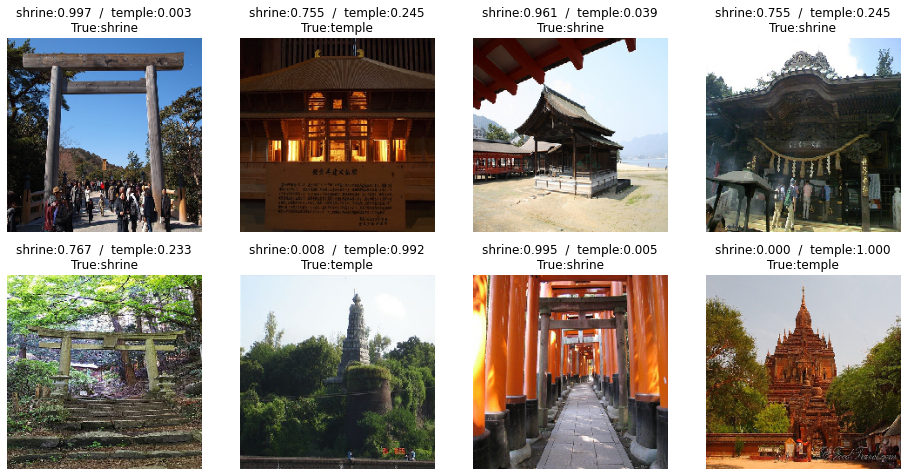

In [16]:
from utils import show_test_samples


# 평가용이미지 표시
show_test_samples(
    x_test, probs, 
    img_itr_train.class_indices, 
    true_labels
)

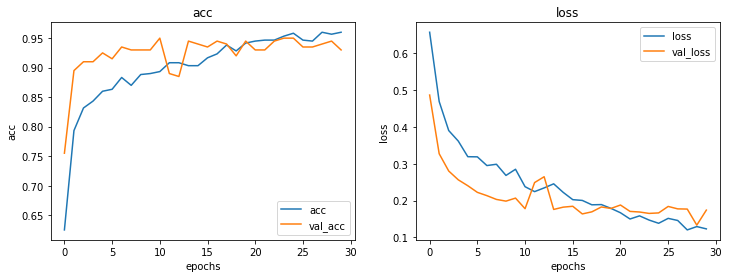

In [17]:
from utils import plot_learningcurve_from_csv


# 학습 곡선 표시
plot_learningcurve_from_csv(csv_filepath)